# Brownian Motion For A Harmonic Oscillator

We generalize the discussions of the previous chapter to include a quadratic potential term. The SDEs are

$$
\newcommand{\mean}[1]{\langle #1 \rangle}
\newcommand{\f}[2]{\frac{#1}{#2}}
\begin{eqnarray}
dX(t) &=& V(t) dt \\
dV(t) &=& - \left[ \omega^2 X(t)  + \gamma V(t) \right] dt + \beta dW_t
\end{eqnarray}
$$

Following through with the steps of the previous chapter we obtain SDEs for $dV^2(t),dX^2(t)$ and $dXV(t)$ using Ito's rule and take expectation values. On massaging the resultant equations we get the following ODEs for the first moments

$$
\begin{eqnarray}
\f{d \mean{X(t)}}{dt} &=& \mean{V(t)} \\
\f{d \mean{V(t)}}{dt} &=& - \omega^2 \mean{X(t)} - \gamma \mean{V(t)}
\end{eqnarray}
$$

and the following for the second moments

$$ \begin{eqnarray}
\f{d var(X(t))}{dt} &=& 2 cov(X(t),V(t)) \\
\f{d var(V(t))}{dt} &=& \beta^2 - 2 \omega^2 cov(X(t),V(t)) - 2 \gamma var(V(t)) \\
\f{d cov(X(t),V(t))}{dt} &=& var(V(t))-  \gamma cov(X(t),V(t)) - \omega^2 var(X(t))
\end{eqnarray}
$$

As before, since the increments are normally distributed the joint probability distribution of $X(t)$ and $V(t)$ is normal and knowing the first and second moments is sufficient.

These ODEs are readily solved and after imposing initial conditions $X(0)=x_0$ and $V(0)=v_0$ we have

$$
\begin{eqnarray}
\mean{X(t)} &=& e^{-\gamma t/2} \left[ x_0 \cos (\omega' t) + \left( v_0 + \f{\gamma x_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right] \\
\mean{V(t)} &=& e^{-\gamma t/2} \left[ v_0 \cos (\omega' t) - \left( x_0 \omega^2 + \f{\gamma v_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right] \\
var(X(t)) &=& \f{\beta^2}{2 \gamma \omega^2} + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2 \omega^2}\right) \\
&& \times [-4 \omega^2 + \gamma^2 \cos(\omega' t)-2 \gamma \omega' \sin(2\omega' t)] \\
var(V(t)) &=& \f{\beta^2}{2 \gamma } + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2}\right) \\
&& \times [-4 \omega^2 + \gamma^2 \cos(\omega' t)+2 \gamma \omega' \sin(2\omega' t)] \\
Cov(X(t),V(t)) &=& e^{-\gamma t}\left( \f{\beta^2}{4 {\omega '}^2}\right) \left[1- \cos(2 \omega't) \right]
\end{eqnarray}
$$

where $\omega'=\sqrt{\omega^2 - \gamma^2/4}$. Thus we have

$$
V(t) = \mathcal N \Bigg( e^{-\gamma t/2} \left[ v_0 \cos (\omega' t) - \left( x_0 \omega^2 + \f{\gamma v_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right], \sqrt{\f{\beta^2}{2 \gamma } + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2}\right)\left [-4 \omega^2 + \gamma^2 \cos(\omega' t)+2 \gamma \omega' \sin(2\omega' t)\right]} \Bigg)
$$

and

$$
X(t) = \mathcal N \Bigg( e^{-\gamma t/2} \left[ x_0 \cos (\omega' t) + \left( v_0 + \f{\gamma x_0}{2} \right) \f{\sin(\omega 't)}{\omega '} \right],\sqrt{\f{\beta^2}{2 \gamma \omega^2} + e^{-\gamma t}\left( \f{\beta^2}{8 \gamma {\omega '}^2 \omega^2}\right) \left[-4 \omega^2 + \gamma^2 \cos(\omega' t)-2 \gamma \omega' \sin(2\omega' t)\right]}  \Bigg)
$$


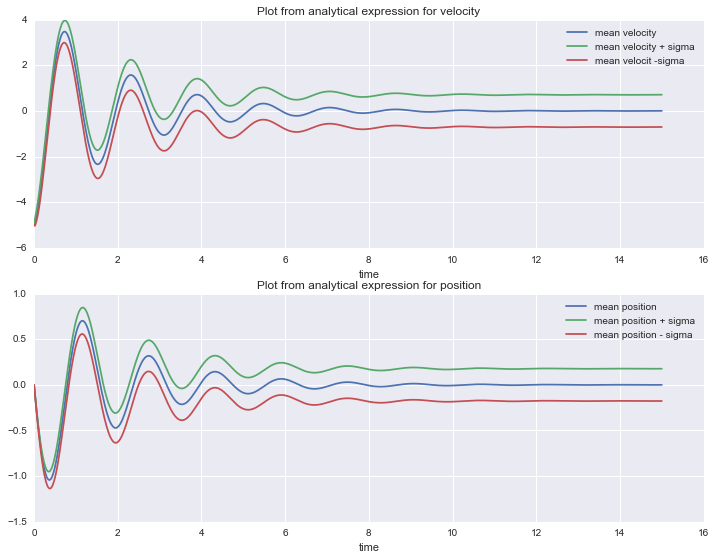

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize
figsize(12, 9)


# Parameters
beta=1.0
gamma=1.0
omega=4.0
omegap=np.sqrt(omega**2 - gamma**2/4.0)

# Initial values
v0=-5.0
x0=0.0

t=np.linspace(0,15,1000)
vmean=np.exp(-gamma*t/2)*( v0 *np.cos(omegap*t) - (x0 * omega**2 + gamma*v0/2.0)*np.sin(omegap *t)/omegap)
std_vel=np.sqrt(beta**2/(2*gamma) + np.exp(-gamma*t)*(beta**2/(8*gamma*omegap**2))*(-4*omega**2 + gamma**2 * np.cos(omegap*t) + 2*gamma*omegap*np.sin(2*omegap*t)))
vup=vmean+std_vel
vdown=vmean-std_vel
plt.subplot(211)
plt.plot(t,vmean,label="mean velocity")
plt.plot(t,vup,label="mean velocity + sigma")
plt.plot(t,vdown,label="mean velocit -sigma")
plt.xlabel("time")
plt.title("Plot from analytical expression for velocity")


plt.legend()



plt.subplot(212)
xmean=np.exp(-gamma*t/2)*( x0 *np.cos(omegap*t) + (v0 + gamma*x0/2.0)*np.sin(omegap *t)/omegap)
std_pos=np.sqrt(beta**2/(2*gamma*omega**2) + np.exp(-gamma*t)*(beta**2/(8*gamma*omegap**2*omega**2))*(-4*omega**2 + gamma**2 * np.cos(omegap*t) - 2*gamma*omegap*np.sin(2*omegap*t)))


xup=xmean+std_pos
xdown=xmean-std_pos
plt.plot(t,xmean,label="mean position")
plt.plot(t,xup,label="mean position + sigma")
plt.plot(t,xdown,label="mean position - sigma")
plt.xlabel("time")
plt.title("Plot from analytical expression for position")


plt.legend()




## Simulating the motion

### The WRONG way

We would like to simulate the motion like in the previous section on simple Brownian motion but if we do it the same way we see the results do not match the analytical expression.

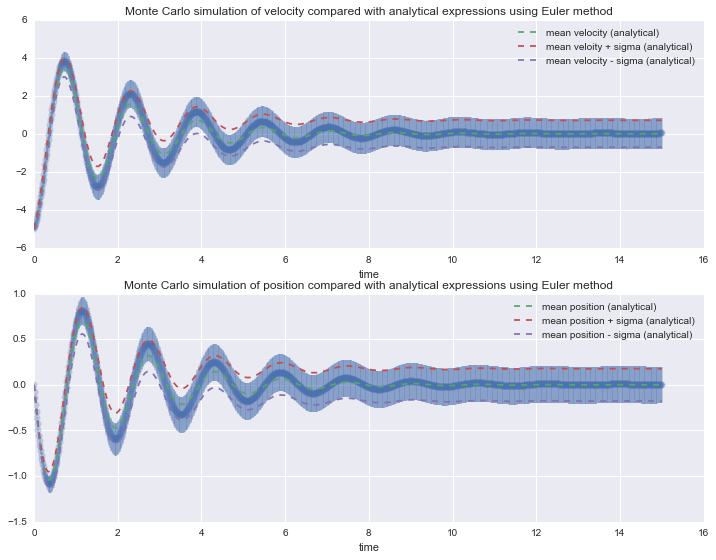

In [2]:
class Paths(object):
    
    def __init__(self,x0,v0,beta,gamma,omega,T,nsteps,npaths,method="Euler"):
        self.x0=x0
        self.v0=v0
        self.beta=beta
        self.gamma=gamma
        self.omega=omega
        self.T=T
        self.nsteps=nsteps
        self.npaths=npaths
        self.dt=1.0*T/nsteps
        self.time=np.linspace(0,self.T,self.nsteps)
        self.dW=np.sqrt(self.dt)
        self.randoms=np.random.normal(0,1,npaths*(nsteps-1))
        self.randoms.shape=[npaths,nsteps-1]
        if not method=="Euler":
            self.randoms_sk=np.random.choice([1.0,-1.0],npaths*(nsteps-1))
            self.randoms_sk.shape=[npaths,nsteps-1]
        
        
        
        paths_X=np.zeros(shape=(npaths,nsteps))
        paths_V=np.zeros(shape=(npaths,nsteps))
        
        
        paths_X[:,0]=self.x0
        paths_V[:,0]=self.v0
        
        dummy_zeros=np.zeros_like(paths_X[:,0])
    
        
        for i in range(nsteps-1):
            
            if method=="Euler":
                y=np.array([paths_X[:,i],paths_V[:,i]])
                ynew=y+self.dt*self.derivative_change(y, t)+np.array([dummy_zeros,self.beta*self.dW*self.randoms[:,i]])
                paths_X[:,i+1],paths_V[:,i+1]=ynew
            else:
                # Runge Kutta Method SDE method based on http://arxiv.org/pdf/1210.0933v1.pdf           
                y=np.array([paths_X[:,i],paths_V[:,i]])
                k0 = self.dt*self.derivative_change(y, t) + np.array([dummy_zeros,self.beta*self.dW*(self.randoms[:,i]+self.randoms_sk[:,i])])
                k1 = self.dt*self.derivative_change(y + k0, t + self.dt)+np.array([dummy_zeros,self.beta*self.dW*(self.randoms[:,i]-self.randoms_sk[:,i])])
                ynew=y + 0.5*(k0 + k1)
            
                paths_X[:,i+1]=ynew[0]
                paths_V[:,i+1]=ynew[1] 
            
        self.paths_V=paths_V
        self.paths_X=paths_X
        
    def get_paths_V(self):
        return self.paths_V
    
    def get_paths_X(self):
        return self.paths_X
    
    def get_timeline(self):
        return self.time
    
    def derivative_change(self,vector,time):
        x,v=vector
        xnew=v
        vnew=-self.omega**2*x- self.gamma*v
        return np.array([xnew,vnew])
    

paths=Paths(x0,v0,beta,gamma,omega,15,1000,10000)
v_mean=paths.get_paths_V().mean(0)
v_std=paths.get_paths_V().std(0)

x_mean=paths.get_paths_X().mean(0)
x_std=paths.get_paths_X().std(0)

t_paths=paths.get_timeline()

plt.subplot(211)
plt.errorbar(t_paths,v_mean,yerr=v_std,fmt='o',alpha=.3)
plt.plot(t,vmean,"--",label="mean velocity (analytical)")
plt.plot(t,vup,"--",label="mean veloity + sigma (analytical)")
plt.plot(t,vdown,"--",label="mean velocity - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of velocity compared with analytical expressions using Euler method")

plt.legend()

plt.subplot(212)
plt.errorbar(t_paths,x_mean,yerr=x_std,fmt='o',alpha=.3)
plt.plot(t,xmean,"--",label="mean position (analytical)")
plt.plot(t,xup,"--",label="mean position + sigma (analytical)")
plt.plot(t,xdown,"--",label="mean position - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of position compared with analytical expressions using Euler method")


plt.legend()



The reason for this discrepancy has nothing to do with the stochastics but is present even when solving a non-stochastic harmonic oscillator. This is corrected for ODEs using the Runge-Kutta method that reduces the error in each step by taking into account higher order terms. This is a very rich subject and is even richer for SDEs and finding optimum ways to solve them numerically is still ongoing research. I will present below a method introduced in      http://arxiv.org/pdf/1210.0933v1.pdf

In fact the code is already there above and we mearly re-run the code while specifying we want it to use the latter method.

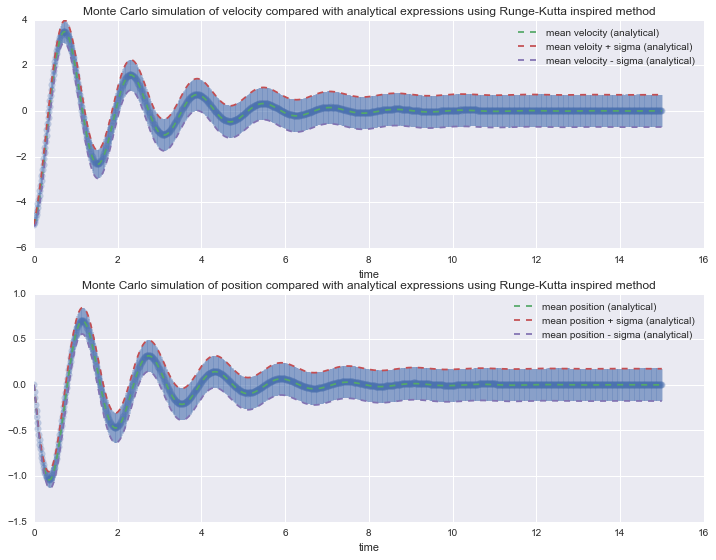

In [3]:
paths=Paths(x0,v0,beta,gamma,omega,15,1000,10000,"runge-kutta")
v_mean=paths.get_paths_V().mean(0)
v_std=paths.get_paths_V().std(0)

x_mean=paths.get_paths_X().mean(0)
x_std=paths.get_paths_X().std(0)

t_paths=paths.get_timeline()

plt.subplot(211)
plt.errorbar(t_paths,v_mean,yerr=v_std,fmt='o',alpha=.3)
plt.plot(t,vmean,"--",label="mean velocity (analytical)")
plt.plot(t,vup,"--",label="mean veloity + sigma (analytical)")
plt.plot(t,vdown,"--",label="mean velocity - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of velocity compared with analytical expressions using Runge-Kutta inspired method")

plt.legend()

plt.subplot(212)
plt.errorbar(t_paths,x_mean,yerr=x_std,fmt='o',alpha=.3)
plt.plot(t,xmean,"--",label="mean position (analytical)")
plt.plot(t,xup,"--",label="mean position + sigma (analytical)")
plt.plot(t,xdown,"--",label="mean position - sigma (analytical)")
plt.xlabel("time")
plt.title("Monte Carlo simulation of position compared with analytical expressions using Runge-Kutta inspired method")


plt.legend()

We see a much better agreement with analytical results. This shows that when one does not have analytical results one should be careful in juding the results of the numerical simulations and take proper care of the amount of error introduced by the simulation procedure.

We can plot a few representative paths.

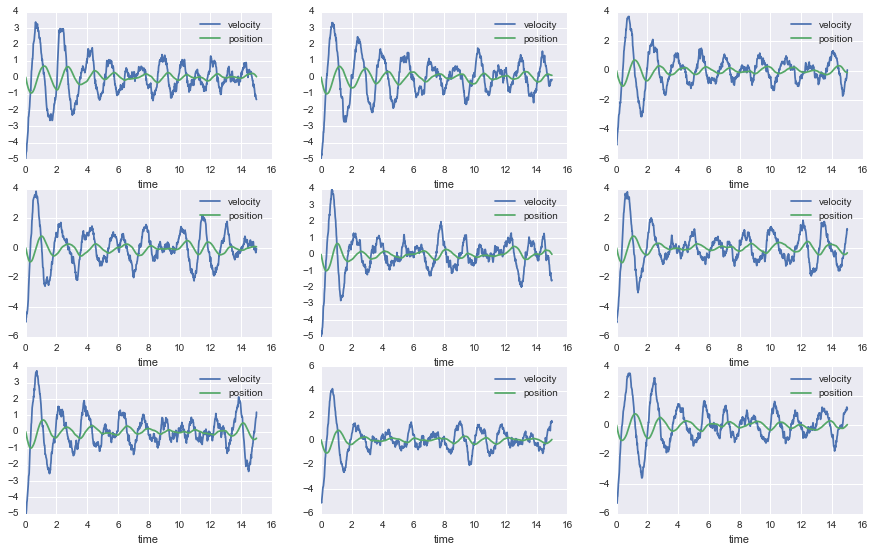

In [5]:
figsize(15,9)
number_columns=3
number_rows=3
for i,j in enumerate([(i/number_columns,i%number_columns) for i in range(number_columns*number_rows)]):
    plt.subplot2grid((number_rows,number_columns),j)
    plt.plot(t_paths,paths.get_paths_V()[i],label="velocity")
    plt.plot(t_paths,paths.get_paths_X()[i],label="position")
    plt.xlabel("time")
    plt.legend()



We note that at late times the veclocity fluctuates around $v=0$ (if statistical mechanics this is viewed as resulting from collision of molecules around) as before but the new feature is that the position now also fluctuates around $x=0$ irrespective of where we start from. This is because now there is a cost associated to large values of $x$ because of the harmonic oscillator potential.